In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
import keras
import glob as gb
from scipy import misc
from sklearn.model_selection import train_test_split
import tensorflow as tf
from keras.datasets import fashion_mnist
import pickle
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from keras import models
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import learning_curve
from skimage import color
from skimage import io
import sklearn.metrics as metrics

In [2]:
# to change every_folder with label  

code = {'Tshirt':0 ,'Trouser':1}
#######################
def getcode(n) : 
    for x , y in code.items() : 
        if n == y : 
            return x

In [3]:
trainpath = 'D:/Faaclty/level 3/selcted-1/SVM image2/'
testpath = 'D:/Faaclty/level 3/selcted-1/SVM image2/'

In [4]:
# Reading files [ training_dataset ] 

for folder in  os.listdir(trainpath + 'train') : 
    files = gb.glob(pathname= str( trainpath +'train//' + folder + '/*.jpg'))
    print(f'For training data , found {len(files)} in folder {folder}')

For training data , found 6000 in folder Trouser
For training data , found 6000 in folder Tshirt


In [5]:
for folder in  os.listdir(testpath +'test') : 
    files = gb.glob(pathname= str( testpath +'test//' + folder + '/*.jpg'))
    print(f'For testing data , found {len(files)} in folder {folder}')

For testing data , found 1000 in folder Trouser
For testing data , found 1000 in folder Tshirt


In [6]:
# to get more info about train_data  ex:[size of each pic , color , num of each size] 
size = []
for folder in  os.listdir(trainpath +'test') : 
    files = gb.glob(pathname= str( trainpath +'test//' + folder + '/*.jpg'))
    for file in files: 
        image = plt.imread(file)
        size.append(image.shape)
pd.Series(size).value_counts()

(28, 28)    2000
dtype: int64

In [7]:
# to get more info about train_data  ex:[size of each pic , color , num of each size] 
size = []
for folder in  os.listdir(trainpath +'train') : 
    files = gb.glob(pathname= str( trainpath +'train//' + folder + '/*.jpg'))
    for file in files: 
        image = plt.imread(file)
        size.append(image.shape)
pd.Series(size).value_counts()

(28, 28)    12000
dtype: int64

In [8]:
# to resize images_train to one equalied size      
X_train = []
y_train = []
for folder in  os.listdir(trainpath +'train') : 
    files = gb.glob(pathname= str( trainpath +'train//' + folder + '/*.jpg'))
    for file in files: 
        image = cv2.imread(file)
        imgGray = color.rgb2gray(image)
        imgGray = np.array(imgGray).flatten()
        X_train.append(list(imgGray))
        y_train.append(code[folder])

In [9]:
# to resize images_test to one equalied size 

X_test = []
y_test = []
for folder in  os.listdir(testpath +'test') : 
    files = gb.glob(pathname= str(testpath + 'test//' + folder + '/*.jpg'))
    for file in files: 
        image = cv2.imread(file)
        imgGray = color.rgb2gray( image)
        imgGray = np.array(imgGray).flatten()
        X_test.append(list(imgGray))
        y_test.append(code[folder])

In [10]:
classifier = SVC(C=1 , kernel = 'poly' , gamma = 'auto'  )

In [11]:
classifier.fit(X_train, y_train)


SVC(C=1, gamma='auto', kernel='poly')

In [12]:
acurrecy = classifier.score(X_test,y_test)
print ('acurracy',acurrecy)

acurracy 0.932


In [14]:
pick = open('D:/Faaclty/level 3/selcted-1/SVM image2/SVM_Image2.sav','wb')
pickle.dump(classifier,pick)
pick.close()

In [13]:
from sklearn.metrics import confusion_matrix, accuracy_score
prediction = classifier.predict(X_test)
confusion_matrix = confusion_matrix(y_test, prediction)
print(confusion_matrix)
accuracy_score(y_test, prediction)

[[987  13]
 [123 877]]


0.932

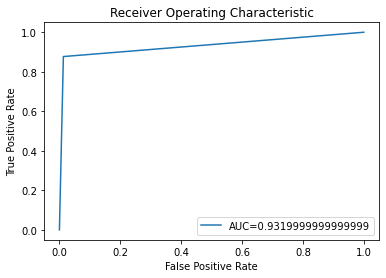

In [14]:
fpr, tpr, _ = metrics.roc_curve(y_test,  prediction)
auc = metrics.roc_auc_score(y_test, prediction)
#create ROC curve
plt.title('Receiver Operating Characteristic')
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [15]:
pick = open('D:/Faaclty/level 3/selcted-1/SVM image2/SVM_Image2.sav','rb')
model = pickle.load(pick)
pick.close()

In [27]:
X_image = []
image = cv2.imread('D:\\Faaclty\\level 3\\selcted-1\\SVM image2\\test\\Trouser\\80.jpg')
imgGray = color.rgb2gray(image)
image_array = cv2.resize(imgGray, (28, 28))
image_array = np.array(image_array).flatten()
X_image.append(list(image_array))
X_test = []
X_test.append(list(image_array))
X_test = np.array(X_test)
y_pred = model.predict(X_test)
getcode(y_pred)


'Trouser'